# Problem Description: Predicting Income Over $50K

The objective is to classify individuals based on various demographic and socio-economic factors to determine if they earn more than $50K annually. The features used for this classification problem include:

- **Age**: The age of the individual.
- **Workclass**: The type of employment or work sector the individual is engaged in.
- **Fnlwgt**: The final weight, which is a representation of the number of people the individual represents.
- **Education**: The highest level of education attained by the individual.
- **Educational-num**: The number of years of education completed.
- **Marital-status**: The marital status of the individual.
- **Occupation**: The occupation of the individual.
- **Relationship**: The relationship of the individual to the household.
- **Race**: The race of the individual.
- **Gender**: The gender of the individual.
- **Capital-gain**: The capital gains acquired by the individual.
- **Capital-loss**: The capital losses incurred by the individual.
- **Hours-per-week**: The number of hours the individual works per week.
- **Native-country**: The country of origin of the individual.

Using these features, the goal is to build a model that can accurately predict whether an individual's income exceeds $50K per year.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import random

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data_respaldo=np.copy(train_data)
test_data_respaldo=np.copy(test_data)

In [3]:
print(train_data.shape)
print(train_data.columns)
print(train_data.dtypes)

(43957, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object


## Data cleaning

### Data imputation

In [4]:
train_data.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [5]:
train_data['workclass']=train_data['workclass'].fillna('unknown')
train_data['occupation']=train_data['occupation'].fillna('unknown')
train_data['native-country']=train_data['native-country'].fillna('unknown')

In [6]:
train_data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

### Data Normalization and Encoding

1. Data Encoding by Frequency.

* workclass object
* education object
* marital-status object
* occupation object
* relationship object
* race object
* gender object
* native-country object

In [7]:
race_nom=train_data['race'].value_counts(normalize=True)
workc_nom=train_data['workclass'].value_counts(normalize=True)
edu_nom=train_data['education'].value_counts(normalize=True)
mar_nom=train_data['marital-status'].value_counts(normalize=True)
occ_nom=train_data['occupation'].value_counts(normalize=True)
rela_nom=train_data['relationship'].value_counts(normalize=True)
#race_nom=train_data['race'].value_counts(normalize=True)
gend_nom=train_data['gender'].value_counts(normalize=True)
n_coun_nom=train_data['native-country'].value_counts(normalize=True)

In [8]:
race_nom

race
White                 0.854744
Black                 0.095957
Asian-Pac-Islander    0.031235
Amer-Indian-Eskimo    0.009578
Other                 0.008486
Name: proportion, dtype: float64

In [9]:
train_data['race']=train_data['race'].map(race_nom)
#"""
train_data['workclass']=train_data['workclass'].map(workc_nom)
train_data['education']=train_data['education'].map(edu_nom)
train_data['marital-status']=train_data['marital-status'].map(mar_nom)
train_data['occupation']=train_data['occupation'].map(occ_nom)
train_data['relationship']=train_data['relationship'].map(rela_nom)
#train_data['race']=train_data['race'].map(race_nom)
train_data['gender']=train_data['gender'].map(gend_nom)
train_data['native-country']=train_data['native-country'].map(n_coun_nom)
#"""

In [10]:
train_data['race']

0        0.854744
1        0.854744
2        0.854744
3        0.854744
4        0.095957
           ...   
43952    0.854744
43953    0.854744
43954    0.854744
43955    0.854744
43956    0.854744
Name: race, Length: 43957, dtype: float64

#### Normalization of the Testing Dataset

In [11]:
race_nom_test=test_data['race'].value_counts(normalize=True)
workc_nom_test=test_data['workclass'].value_counts(normalize=True)
edu_nom_test=test_data['education'].value_counts(normalize=True)
mar_nom_test=test_data['marital-status'].value_counts(normalize=True)
occ_nom_test=test_data['occupation'].value_counts(normalize=True)
rela_nom_test=test_data['relationship'].value_counts(normalize=True)
#race_nom=train_data['race'].value_counts(normalize=True)
gend_nom_test=test_data['gender'].value_counts(normalize=True)
n_coun_nom_test=test_data['native-country'].value_counts(normalize=True)

In [12]:
test_data['race']=test_data['race'].map(race_nom_test)
#"""
test_data['workclass']=test_data['workclass'].map(workc_nom_test)
test_data['education']=test_data['education'].map(edu_nom_test)
test_data['marital-status']=test_data['marital-status'].map(mar_nom_test)
test_data['occupation']=test_data['occupation'].map(occ_nom_test)
test_data['relationship']=test_data['relationship'].map(rela_nom_test)
#train_data['race']=train_data['race'].map(race_nom)
test_data['gender']=test_data['gender'].map(gend_nom_test)
test_data['native-country']=test_data['native-country'].map(n_coun_nom_test)
#"""

In [13]:
x_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]

In [14]:
print(x_train.shape)
print(y_train.shape)

(43957, 14)
(43957,)


## Model implementation

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [16]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
res_raw=neigh.predict(test_data) ### Resultados

In [18]:
print(res_raw[:5])

[0 1 1 0 0]


## Result

In [19]:
##### Resultado sintetico
#res=pd.DataFrame()
#random.seed(1)
tr=np.arange(0,test_data.shape[0],1) ## Datos primero
tres=res_raw#np.random.randint(2,size=test_data.shape[0])

In [20]:
test_pred=np.vstack((tr,tres)).transpose()

In [21]:
res=pd.DataFrame(test_pred,columns=['id','outcome'])

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
res.to_csv('Res.csv',index=False)
#res.to_csv('/content/drive/My Drive/Res_trucho.csv', index=False)

## Final results

The predictions reached a 100% of accuracy

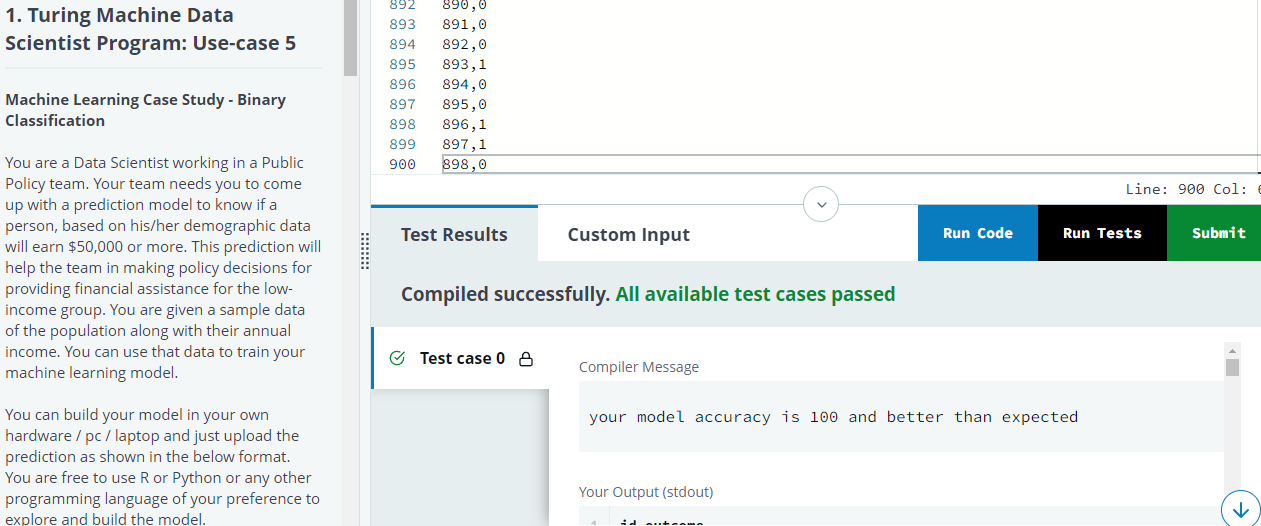


